In [1]:
# pip install imagededup


In [2]:
image_dir=r'OS_Collected_Data'


In [3]:
from imagededup.methods import PHash
phasher = PHash()
image_dir=image_dir
# Generate encodings for all images in an image directory
encodings = phasher.encode_images(image_dir,recursive=True)

# Find duplicates using the generated encodings
duplicates = phasher.find_duplicates(encoding_map=encodings,max_distance_threshold = 0, recursive=True)



2025-01-15 20:03:02,146: INFO Start: Calculating hashes...
100%|██████████| 1947/1947 [00:36<00:00, 53.99it/s]
2025-01-15 20:03:39,877: INFO End: Calculating hashes!
c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\imagededup\methods\hashing.py:315: SyntaxWarning: recursive parameter is irrelevant when using encodings.
  warnings.warn('recursive parameter is irrelevant when using encodings.', SyntaxWarning)
c:\Users\e0l07sq\Anaconda3\envs\osteo_gpu\lib\site-packages\imagededup\methods\hashing.py:317: RuntimeWarning: Parameter num_enc_workers has no effect since encodings are already provided
  warnings.warn('Parameter num_enc_workers has no effect since encodings are already provided', RuntimeWarning)
2025-01-15 20:03:39,881: INFO Start: Evaluating hamming distances for getting duplicates
2025-01-15 20:03:39,882: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 1947/1947 [00:18<00:00, 105.97it/s]
2025-01-15 20:04:00,230: INFO End: Retrieving duplicat

In [4]:
duplicates

{'Normal\\Normal 1.png': ['Normal\\Normal 223.png'],
 'Normal\\Normal 10.png': ['Normal\\Normal 224.png',
  'Normal\\Normal 512.jpg',
  'Normal\\Normal 618.jpg'],
 'Normal\\Normal 100.jpg': ['Normal\\Normal 225.jpg'],
 'Normal\\Normal 101.jpg': ['Normal\\Normal 226.jpg'],
 'Normal\\Normal 102.jpg': ['Normal\\Normal 227.jpg',
  'Normal\\Normal 578.jpg',
  'Normal\\Normal 678.jpg'],
 'Normal\\Normal 103.JPEG': ['Normal\\Normal 228.JPEG'],
 'Normal\\Normal 104.JPEG': ['Normal\\Normal 229.JPEG',
  'Normal\\Normal 426.jpg',
  'Normal\\Normal 708.jpg',
  'Osteoporosis\\Osteoporosis 120.JPEG',
  'Osteoporosis\\Osteoporosis 211.JPEG',
  'Osteoporosis\\Osteoporosis 553.jpg',
  'Osteoporosis\\Osteoporosis 709.jpg'],
 'Normal\\Normal 105.jpg': ['Normal\\Normal 230.jpg'],
 'Normal\\Normal 106.jpg': ['Normal\\Normal 231.jpg',
  'Normal\\Normal 580.jpg',
  'Normal\\Normal 680.jpg'],
 'Normal\\Normal 107.jpg': ['Normal\\Normal 232.jpg',
  'Normal\\Normal 581.jpg',
  'Normal\\Normal 681.jpg'],
 'Norma

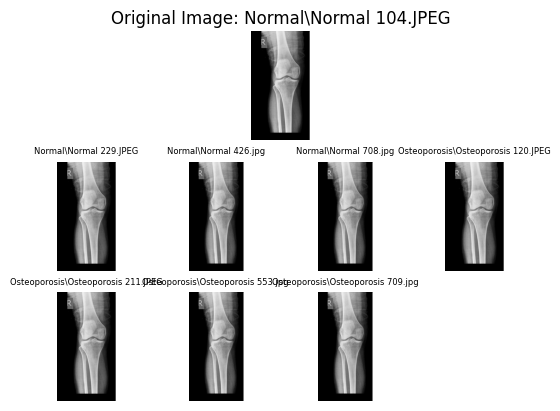

In [5]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir,
                duplicate_map=duplicates,
                filename='Normal\\Normal 104.JPEG')

In [6]:
duplicates

{'Normal\\Normal 1.png': ['Normal\\Normal 223.png'],
 'Normal\\Normal 10.png': ['Normal\\Normal 224.png',
  'Normal\\Normal 512.jpg',
  'Normal\\Normal 618.jpg'],
 'Normal\\Normal 100.jpg': ['Normal\\Normal 225.jpg'],
 'Normal\\Normal 101.jpg': ['Normal\\Normal 226.jpg'],
 'Normal\\Normal 102.jpg': ['Normal\\Normal 227.jpg',
  'Normal\\Normal 578.jpg',
  'Normal\\Normal 678.jpg'],
 'Normal\\Normal 103.JPEG': ['Normal\\Normal 228.JPEG'],
 'Normal\\Normal 104.JPEG': ['Normal\\Normal 229.JPEG',
  'Normal\\Normal 426.jpg',
  'Normal\\Normal 708.jpg',
  'Osteoporosis\\Osteoporosis 120.JPEG',
  'Osteoporosis\\Osteoporosis 211.JPEG',
  'Osteoporosis\\Osteoporosis 553.jpg',
  'Osteoporosis\\Osteoporosis 709.jpg'],
 'Normal\\Normal 105.jpg': ['Normal\\Normal 230.jpg'],
 'Normal\\Normal 106.jpg': ['Normal\\Normal 231.jpg',
  'Normal\\Normal 580.jpg',
  'Normal\\Normal 680.jpg'],
 'Normal\\Normal 107.jpg': ['Normal\\Normal 232.jpg',
  'Normal\\Normal 581.jpg',
  'Normal\\Normal 681.jpg'],
 'Norma

In [7]:
from imagededup.methods import PHash

phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(image_dir=image_dir,max_distance_threshold = 0, recursive=True)

2025-01-15 20:04:00,970: INFO Start: Calculating hashes...
100%|██████████| 1947/1947 [00:40<00:00, 48.55it/s]
2025-01-15 20:04:43,044: INFO End: Calculating hashes!
2025-01-15 20:04:43,045: INFO Start: Evaluating hamming distances for getting duplicates
2025-01-15 20:04:43,046: INFO Start: Retrieving duplicates using BKTree algorithm
100%|██████████| 1947/1947 [00:19<00:00, 97.72it/s]
2025-01-15 20:05:05,114: INFO End: Retrieving duplicates using BKTree algorithm
2025-01-15 20:05:05,115: INFO End: Evaluating hamming distances for getting duplicates


In [8]:
duplicates_list.__len__()

1212

# removing the images

In [9]:
import os
import shutil
# List of image filenames to remove
images_to_remove = duplicates_list

# Paths
source_folder = image_dir  # Folder containing the images
destination_folder = os.path.join(source_folder, "deleted_images")  # Folder for moved images

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Move files
for image_name in images_to_remove:
    source_path = os.path.join(source_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)
    
    try:
        # Ensure the destination subfolder exists
        destination_subfolder = os.path.dirname(destination_path)
        os.makedirs(destination_subfolder, exist_ok=True)
        
        if os.path.exists(source_path):
            shutil.move(source_path, destination_path)
            print(f"Moved: {image_name} to {destination_folder}")
        else:
            print(f"File not found: {image_name}")
    except Exception as e:
        print(f"Error moving {image_name}: {e}")


Moved: Osteoporosis\Osteoporosis 98.png to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 480.jpg to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 324.jpg to OS_Collected_Data\deleted_images
Moved: Osteopenia\Osteopenia 216.jpg to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 762.jpg to OS_Collected_Data\deleted_images
Moved: Normal\Normal 287.jpg to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 644.jpg to OS_Collected_Data\deleted_images
Moved: Normal\Normal 78.jpg to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 660.jpg to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 763.jpg to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 3.JPEG to OS_Collected_Data\deleted_images
Moved: Normal\Normal 288.jpg to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 288.png to OS_Collected_Data\deleted_images
Moved: Osteoporosis\Osteoporosis 481.jpg t

# we need to add logic that if image was in 2 classes(normal and osteo) to remove it from both of them